In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
from random import randrange

In [2]:
float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

In [3]:
def runElbowMethod(X, K_choices):

    cost_list = []
    for K in range(1, K_choices+1):
        centroids = KMeans(X, K, False)
        C = predict(X, centroids)

        cost = calculate_cost(X, centroids, C)

        cost_list.append(cost)

    plt.figure()
    plt.plot(list(range(1, K_choices+1)), cost_list, marker="o")
    plt.title('Cost for different Ks')
    plt.xlabel('K')
    plt.ylabel('Within-Cluster Sum of Square Cost')
    plt.show()

In [4]:
def euclidean_distance(sample, centroids):

    return np.sqrt(np.sum((sample - centroids)**2, axis=1))

In [5]:
def initCentroids(X, K):

    randidx = np.random.randint(0, X.shape[0], K)
    
    centroids = X[randidx,:]

    return centroids

In [6]:
def assignClusters(X, centroids): 

    K = centroids.shape[0]
    m = X.shape[0]

    C = np.zeros((m,1))
    
    for i in range(m):
        distances = euclidean_distance(X[i,:], centroids)
        C[i] = np.argmin(distances)

    return C

In [7]:
def recenterCentroids(X, C, K):
    
    m,n = X.shape
    
    df = pd.DataFrame(X)
    df.insert(n,"cluster",C)
    
    centroids = df.groupby(by='cluster').mean().values
    
    return centroids

In [8]:
def KMeans(X, K, plot_progress=True):

    centroids = initCentroids(X, K)
    
    if plot_progress:
        plotInitClusters(X, centroids)
    
    different = True
    i = 0
    centroids_history = []
    
    if plot_progress:
        plotProgress(X, centroids, [], K, 0);
    
    while different:
        
        centroids_history.append(centroids)
        
        i+=1

        C = assignClusters(X, centroids)

        centroids = recenterCentroids(X, C, K)
    
        if np.array_equal(centroids_history[-1], centroids) :
            different=False
        
        if plot_progress:
            plotProgress(X, centroids, centroids_history.copy(), K, i);

    if plot_progress:
        print('\nTraining Complete after {} iterations'.format(i))
    
    return centroids

In [9]:
def plotInitClusters(X, centroids):
    
    plt.scatter(X[:,0],X[:,1], facecolors='none', edgecolors='black', s=25)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='X', s=200)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Initially chosen Clusters')
    plt.show()

In [10]:
def plotProgress(X, centroids, previous, K, i):

    C = assignClusters(X, centroids).squeeze()
    
    colors = cm.rainbow(np.linspace(0, 1, K))
    
    fig, ax = plt.subplots()
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('Cluster positions after iteration: '+str(i))
    
    
    for k in range(K):
        cluster = X[C==k]
        ax.scatter(cluster[:,0], cluster[:,1], facecolors='none', edgecolors=colors[k], s=25, label="cluster"+str(k))

    ax.legend()

    previous.append(centroids)
    history = np.array(previous)
    
    for clus in range(K):
        x_values = history[:,clus,0]
        y_values = history[:,clus,1]

        plt.plot(x_values, y_values, linestyle="--", c='black', markeredgecolor ='black', marker='X',
                 markersize=10,markerfacecolor=colors[clus] , linewidth=2)
     
    plt.show()

In [11]:
def plotClusteredSamples(X, C, K, centroids):
    
    colors = cm.rainbow(np.linspace(0, 1, K))
    C = C.squeeze()
    
    fig, ax = plt.subplots()
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('Clustered Samples')
    
    
    for k in range(K):
        cluster = X[C==k]
        ax.scatter(cluster[:,0], cluster[:,1], facecolors='none', edgecolors=colors[k], s=25, label="cluster"+str(k))

    ax.legend()

    centroids = np.array(centroids)
    
    for clus in range(K):
    
        plt.plot(centroids[clus,0], centroids[clus,1], linestyle="--", c='black', markeredgecolor ='black', marker='X',
                 markersize=10,markerfacecolor=colors[clus] , linewidth=2)
    
    plt.show()

In [12]:
def predict(X_test, centroids):
    
    C = assignClusters(X_test, centroids)
    
    return C

In [13]:
def calculate_cost(X, centroids, cluster):
    
    C=cluster
    C = C.squeeze()
    cost = 0
    
    K = centroids.shape[0]
    
    for i in range(K):
        cost+= np.sum((X[C==i]-centroids[i])**2)
    
    return cost

Helper functions:

In [14]:
def normalize(X, bias_added=True):
    
    mu = X.mean(axis=0, keepdims=True)
    std = X.std(axis=0, keepdims=True)
    
    if bias_added==True:
        mu[0,0]=0
        std[0,0]=1
    
    X = (X-mu)/std
    
    return X, mu, std

def normalize_test(X, mu, std):
    
    X = (X-mu)/std
    
    return X

In [15]:
def plotData(X):
    
    plt.scatter(X[:,0],X[:,1], facecolors='none', edgecolors='black', s=25)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Plot of Unclustered data')
    plt.show()

Training

In [16]:
K = 4    
n_samples = 200


X_train = datasets.make_blobs(n_samples=n_samples, centers=K, random_state=10, cluster_std=2.3)

X_train = np.array(X_train[0], dtype=float)

In [17]:
X_train, mu, std = normalize(X_train, False)

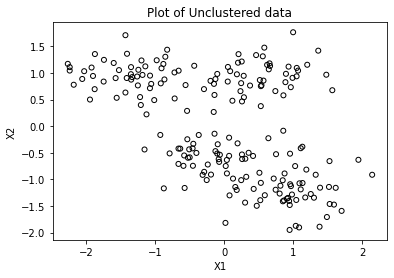

In [18]:
plotData(X_train)

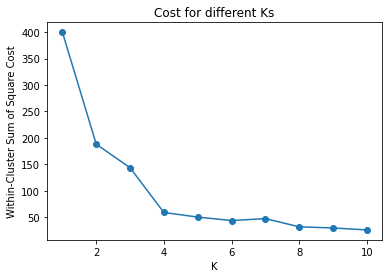

In [19]:
K_choices = 10
runElbowMethod(X_train, K_choices)

As per the Elbow Method results picking K = 4

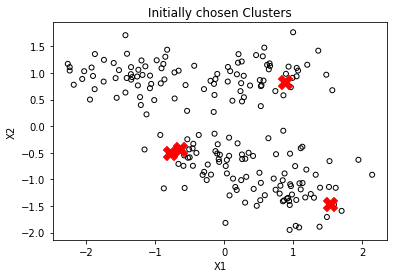

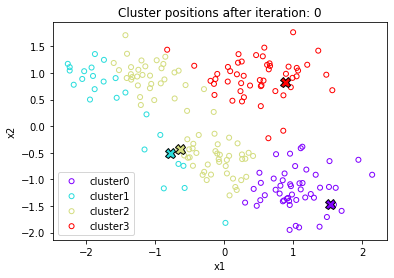

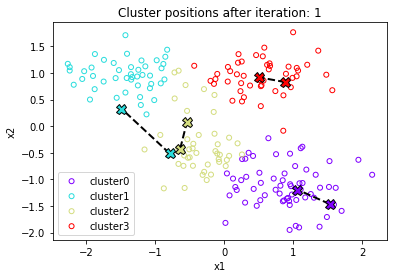

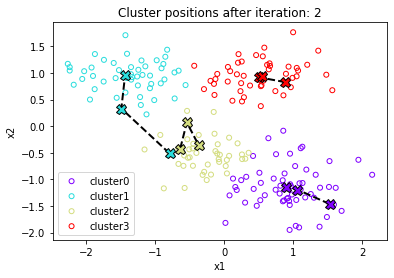

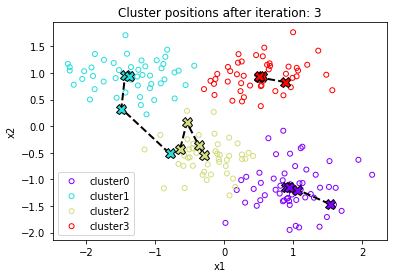

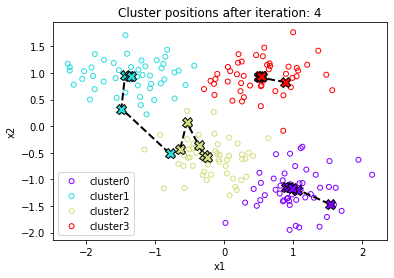

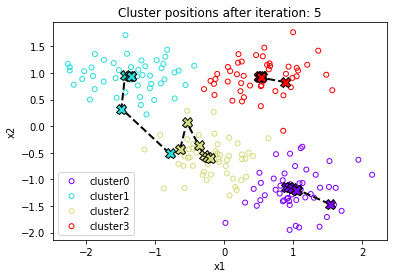

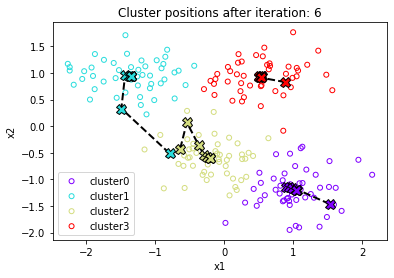


Training Complete after 6 iterations


In [20]:
centroids = KMeans(X_train, K)

Evaluation

In [21]:
C = predict(X_train, centroids)
cost = calculate_cost(X_train, centroids, C)

print("Final cost on the training data is: ",cost)

Final cost on the training data is:  58.797252804341355


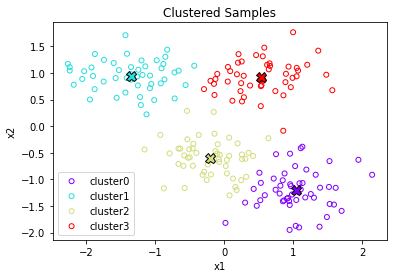

In [22]:
plotClusteredSamples(X_train, C, centroids.shape[0], centroids)